# Week 8 assignment: NLP on social media data

Take our social media we collected last week and:

- extract the sentiment scores of the titles of the posts
    - you can use the keyword method, Python packages, or other methods to extract the sentiment scores
- plot a histogram of the sentiment scores
- look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
- examine the text for some of the highest and lowest sentiment scores
- write a short analysis of the results and our process, as well as propose one idea for something we could use this data for

Optional advanced challenges:
- Compare different sentiment analysis methods (e.g. textblob and VADER). Does one seem to work better than another?
- Get the sentiments of the comments for each post. We can do a lot with this, such as:
    - look at the average sentiment for each post and compare it with the sentiment of the title and/or text
    - look at the distribution of sentiments for each post and find the posts with the widest range of sentiments (controversial posts)
- Examine the subjectivity of our data (e.g. using textblob)
- Use topic modeling on the posts
    - you can also add in the comments to the topic model
- Look at the most frequent words for positive and negative sentiment posts

Note: There is no assignment solution file for this week.

In [1]:
#extract the sentiment scores of the titles of the posts
##you can use the keyword method, Python packages, or other methods to extract the sentiment scores
import sqlite3
import pandas as pd

con = sqlite3.connect('co_reddit.sqlite')
df = pd.read_sql_query('SELECT * from posts;', con)
con.close()
df



,index,title,link,author,n_comments,score,text,id
0,0,"Red Rocks, 1974 John Denver concert",/r/Colorado/comments/mug406/red_rocks_1974_joh...,Mellotime,1,28,,mug406
1,1,Hiking the Royal Gorge in a spring snowstorm,/r/Colorado/comments/muffdl/hiking_the_royal_g...,TaipeiPersonality_,1,19,,muffdl
2,2,Rocky Mountain National Park this weekend!,/r/Colorado/comments/mufe4j/rocky_mountain_nat...,TaipeiPersonality_,2,19,,mufe4j
3,3,Milky way at Loveland Pass last weekend,/r/Colorado/comments/mud617/milky_way_at_lovel...,Sutitan,35,692,,mud617
4,4,Weminuche Wilderness,/r/Colorado/comments/mu835a/weminuche_wilderness/,finerminer17,13,189,,mu835a
...,...,...,...,...,...,...,...,...
912,912,Hoarfrost on one of my sundials this brisk mor...,/r/Colorado/comments/kcnpj5/hoarfrost_on_one_o...,IronRainForge,5,78,,kcnpj5
913,913,The Stanley Hotel after some snow,/r/Colorado/comments/kclire/the_stanley_hotel_...,TFG4,9,251,,kclire
914,914,The stanley hotel in Estes in October,/r/Colorado/comments/kclfwi/the_stanley_hotel_...,TFG4,1,44,,kclfwi
915,915,Picture my dad took - Sawatch Range just SW of...,/r/Colorado/comments/kckwut/picture_my_dad_too...,theredcameron,6,95,,kckwut


In [2]:
#extract the sentiment scores of the titles of the posts
##you can use the keyword method, Python packages, or other methods to extract the sentiment scores
sentiment_df = pd.read_csv('AFINN-en-165.txt', sep='\t', names=['word', 'score'], index_col='word')
sentiment_df

,score
word,
abandon,-2
abandoned,-2
abandons,-2
abducted,-2
abduction,-2
...,...
yucky,-2
yummy,3
zealot,-2


In [3]:
#extract the sentiment scores of the titles of the posts
##you can use the keyword method, Python packages, or other methods to extract the sentiment scores
sentiment_dict = sentiment_df.to_dict()['score']

In [4]:
#extract the sentiment scores of the titles of the posts
##you can use the keyword method, Python packages, or other methods to extract the sentiment scores
import numpy as np

title_sentiments = []
for title in df['title']:
    words = title.lower().split()
    this_titles_sentiments = []
    for w in words:
        if w in sentiment_dict.keys():
            this_titles_sentiments.append(sentiment_dict[w])
        else:
            this_titles_sentiments.append(0)
            
            
    title_sentiments.append(np.mean(this_titles_sentiments))
    
title_sentiments

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -0.18181818181818182,
 0.0,
 0.0,
 0.16666666666666666,
 0.42857142857142855,
 0.0,
 0.0,
 0.0,
 0.0,
 0.16666666666666666,
 0.0,
 0.0,
 -0.08695652173913043,
 -0.1875,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.125,
 0.3333333333333333,
 -0.14285714285714285,
 0.1111111111111111,
 0.0,
 -0.25,
 -0.2727272727272727,
 -0.2,
 0.0,
 -0.375,
 0.18181818181818182,
 -0.2,
 0.0,
 0.11538461538461539,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.125,
 -0.11764705882352941,
 -0.5,
 0.0,
 0.0,
 0.17647058823529413,
 -0.15,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.1111111111111111,
 0.0,
 0.045454545454545456,
 0.5,
 0.0,
 0.0,
 0.1875,
 0.3333333333333333,
 0.0,
 0.0,
 0.13333333333333333,
 0.0,
 0.0,
 0.2857142857142857,
 0.0,
 0.3333333333333333,
 0.35714285714285715,
 0.0,
 0.0,
 0.10526315789473684,
 0.2727272727272727,
 0.0,
 0.0,
 0.0,
 0.16666666666666666,
 0.3333333333333333,
 0.2857142857142857,
 0.2857142857142857,
 0.0,
 0.0,
 0.6666666

<AxesSubplot:ylabel='Frequency'>

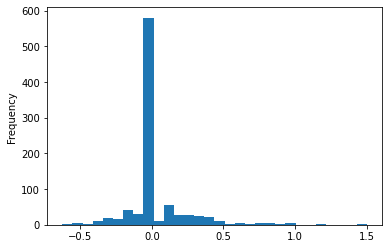

In [5]:
#plot a histogram of the sentiment scores
df['keyword_sentiment'] = title_sentiments
df['keyword_sentiment'].plot.hist(bins=30)


In [6]:
#look at descriptive statistics (mean, median, standard deviation) of the sentiment scores
df_mean = df['keyword_sentiment'].mean()
df_med = df['keyword_sentiment'].median()
df_std = df['keyword_sentiment'].std()

print(f'Mean: {df_mean}\nMedian: {df_med}\nStd. Deviation: {df_std}')



Mean: 0.0412800450004885
Median: 0.0
Std. Deviation: 0.21043836291116857


In [7]:
#examine the text for some of the highest and lowest sentiment scores
print('Lowest Sentiment Scores')
#df.sort_values(by='keyword_sentiment')[['title', 'keyword_sentiment']]
df.sort_values(by='keyword_sentiment')['title'].to_list()[:10]

Lowest Sentiment Scores


['Colorado judge strikes down Boulder’s assault weapons ban',
 'Arrests made in deadly Green Valley Ranch arson',
 '7 Injured, 1 Killed In Berthoud Pass Head-On Crash',
 '9News, Parent Company Accused of Racist Behavior in Federal Filing',
 'Animal cruelty initiative irks Colorado ranchers',
 'Muslim groups mourn and raise money for Colorado shooting victims',
 'MISSING PERSON— Marlena Mizell',
 'Dismal snow at Loveland',
 'Three backcountry skiers killed in Colorado avalanche',
 'Parker mayor denies knowledge of QAnon and conspiracy theories that he tweeted.']

In [8]:
#examine the text for some of the highest and lowest sentiment scores
print('\nHighest Sentiment Scores')
df.sort_values(by='keyword_sentiment', ascending=False)['title'].to_list()[:10]


Highest Sentiment Scores


['Beautiful Ouray',
 'Love the beautiful snowy Rockies!',
 'Mt. Champion',
 'Colorados beautiful nature',
 'Great White Buffalo',
 'Glorious morning',
 'Hello Beautiful 💕',
 'Good morning Colorado!',
 'Super rad, this guy wins Colorado today. 🤘🏼',
 'The beautiful Great Sand Dunes National Park']

# Summary

Write a short summary of what you did and the results here.

In this assignment, I downloaded the data from the previous assignment located on the WorldClass website. I then loaded this dataframe into the Jupyter notebook. Planning to extract the sentiment scores of the tites of the posts using the keyword method, I also loaded in the keyword file 'AFINN-en-165.txt' from the working directory. Using the social media dataframe and the keyword dataframe, I extracted the sentiment scores of the titles of the social media posts and plotted a histogram of the data.

After plotting the histogram, I used the pandas package to calculate the mean, median, and standard deviation of the data, and printed this data to the console. I sorted the keyword sentiment scores twice, once by ascending and once by descending, and printed each sorted output to the console. 

This assignment was strikingly similar to the FTE example, which made it a bit dry but interesting nonetheless to see how scores can be assigned to social media posts based on the tone of the title wording. 

Thank you!
Jeremy